In [3]:
! pip install -U scikit-learn
! pip install numpy==1.17.0
! pip install nltk
! pip install seaborn

  Using cached https://files.pythonhosted.org/packages/ea/bc/da526221bc111857c7ef39c3af670bbcf5e69c247b0d22e51986f6d0c5c2/numpy-1.19.5-cp36-cp36m-win_amd64.whl
  Found existing installation: numpy 1.17.0
    Uninstalling numpy-1.17.0:
      Successfully uninstalled numpy-1.17.0


  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 23.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import confusion_matrix

In [63]:
filtered_emails_frame = pd.read_csv('./Preprocess_emails.csv')

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
X = filtered_emails_frame.content
y = filtered_emails_frame.label.astype(int)
vector = CountVectorizer()
X = vector.fit_transform(X)
X.toarray().shape

(3063, 59324)

In [76]:
trainx, testx, trainy, testy = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

f1_scores = dict()
accuracy_scores = dict()

## 1.SVM

c:0.1
accuracy_score:0.9815016322089227, roc-auc:0.9640967857974143, f1-score:0.9288702928870294, recall:0.940677966101695, precision:0.9173553719008265
c:0.2
accuracy_score:0.9804134929270947, roc-auc:0.9632276147238741, f1-score:0.9243697478991597, recall:0.9401709401709402, precision:0.9090909090909091
c:0.3
accuracy_score:0.9804134929270947, roc-auc:0.9632276147238741, f1-score:0.9243697478991597, recall:0.9401709401709402, precision:0.9090909090909091
c:0.4
accuracy_score:0.9804134929270947, roc-auc:0.9632276147238741, f1-score:0.9243697478991597, recall:0.9401709401709402, precision:0.9090909090909091
c:0.5
accuracy_score:0.9804134929270947, roc-auc:0.9632276147238741, f1-score:0.9243697478991597, recall:0.9401709401709402, precision:0.9090909090909091
c:0.6
accuracy_score:0.9804134929270947, roc-auc:0.9601365546218488, f1-score:0.925, recall:0.9327731092436975, precision:0.9173553719008265
c:0.7
accuracy_score:0.9804134929270947, roc-auc:0.9601365546218488, f1-score:0.925, recal

Text(33.0, 0.5, 'true')

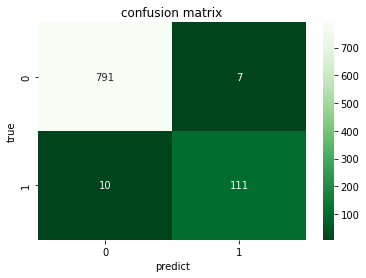

In [77]:
svm_accuracy_dict = dict()
svm_c_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
svm_y_pred_max = 0
svm_testy_max = 0
svm_acc_max = 0
svm_f1_max = 0
svm_c_max = 0
for c in svm_c_list:
  svm_linear = LinearSVC(max_iter=100000,C=c,penalty='l2')
  svm_linear.fit(trainx,trainy)
  y_pred = svm_linear.predict(testx)
  acc = accuracy_score(y_pred,testy)
  auc = roc_auc_score(y_pred,testy)
  f1 = f1_score(y_pred,testy)
  recall = recall_score(y_pred,testy)
  precision = precision_score(y_pred,testy)
  if svm_acc_max < acc:
    svm_acc_max = acc
    svm_y_pred_max = y_pred
    svm_testy_max = testy
    svm_f1_max = f1
    svm_c_max = c
  svm_accuracy_dict[str(c)]=acc
  print('c:%s' % c)
  print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))
  
f1_scores['svm_linear'] = svm_f1_max
accuracy_scores['svm_linear'] = svm_acc_max



cm = confusion_matrix(svm_testy_max,svm_y_pred_max)

ax = sn.heatmap(cm,annot=True,fmt='.20g',cmap='Greens_r')
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

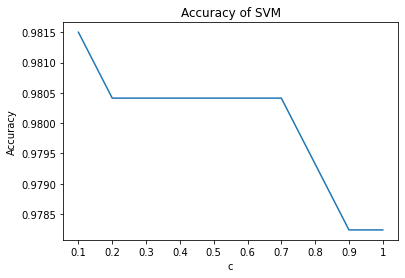

In [78]:
svm_s=pd.Series(svm_accuracy_dict,name='value')
sn.lineplot(data=svm_s)
plt.title('Accuracy of SVM')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.show()

## 2.KNN

n:1
accuracy_score:0.9575625680087051, roc-auc:0.893072458868605, f1-score:0.848249027237354, recall:0.8014705882352942, precision:0.9008264462809917
n:2
accuracy_score:0.9608269858541894, roc-auc:0.9039650094935483, f1-score:0.8571428571428571, recall:0.8244274809160306, precision:0.8925619834710744
n:3
accuracy_score:0.970620239390642, roc-auc:0.9745705834099778, f1-score:0.8767123287671232, recall:0.9795918367346939, precision:0.7933884297520661
n:4
accuracy_score:0.9684439608269858, roc-auc:0.9688595291953566, f1-score:0.867579908675799, recall:0.9693877551020408, precision:0.7851239669421488
n:5
accuracy_score:0.9640914036996736, roc-auc:0.9615481976508707, f1-score:0.8479262672811061, recall:0.9583333333333334, precision:0.7603305785123967
n:6
accuracy_score:0.9640914036996736, roc-auc:0.9658607350096712, f1-score:0.8465116279069769, recall:0.9680851063829787, precision:0.7520661157024794
n:7
accuracy_score:0.9597388465723613, roc-auc:0.9628266988339366, f1-score:0.82464454976303

Text(33.0, 0.5, 'true')

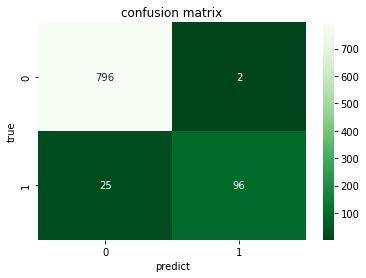

In [79]:
knn_accuracy_dict = dict()
knn_n_list = [1,2,3,4,5,6,7,8,9,10]
knn_y_pred_max = 0
knn_testy_max = 0
knn_acc_max = 0
knn_f1_max = 0
knn_n_max = 0
for n in knn_n_list:
  knn = KNeighborsClassifier(n_neighbors = n,p=2,weights='distance')
# knn = KNeighborsClassifier(n_neighbors = 10,p=2,weights='distance')
  knn.fit(trainx,trainy)
  y_pred = knn.predict(testx)
  acc = accuracy_score(y_pred,testy)
  auc = roc_auc_score(y_pred,testy)
  f1 = f1_score(y_pred,testy)
  recall = recall_score(y_pred,testy)
  precision = precision_score(y_pred,testy)
  if knn_acc_max < acc:
    knn_acc_max = acc
    knn_y_pred_max = y_pred
    knn_testy_max = testy
    knn_f1_max = f1
    knn_n_max = n
  knn_accuracy_dict[str(n)]=acc
  print('n:%s' % n)
  print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))

f1_scores['knn'] = knn_f1_max
accuracy_scores['knn'] = knn_acc_max



cm = confusion_matrix(knn_testy_max,knn_y_pred_max)

ax = sn.heatmap(cm,annot=True,fmt='.20g',cmap='Greens_r')
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

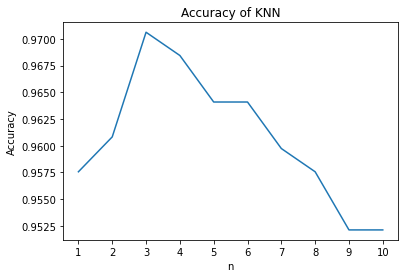

In [80]:
knn_s=pd.Series(knn_accuracy_dict,name='value')
sn.lineplot(data=knn_s)
plt.title('Accuracy of KNN')
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.show()

## 3.DecisionTree

max_depth:10
accuracy_score:0.9662676822633297, roc-auc:0.9415664681424879, f1-score:0.8658008658008658, recall:0.9090909090909091, precision:0.8264462809917356
max_depth:20
accuracy_score:0.9684439608269858, roc-auc:0.9435851478137722, f1-score:0.8755364806866952, recall:0.9107142857142857, precision:0.8429752066115702
max_depth:30
accuracy_score:0.9651795429815017, roc-auc:0.9374554009455001, f1-score:0.8620689655172413, recall:0.9009009009009009, precision:0.8264462809917356
max_depth:40
accuracy_score:0.9630032644178455, roc-auc:0.9384927029142305, f1-score:0.8508771929824561, recall:0.9065420560747663, precision:0.8016528925619835
max_depth:50
accuracy_score:0.9673558215451578, roc-auc:0.9457526333673123, f1-score:0.8695652173913043, recall:0.9174311926605505, precision:0.8264462809917356
max_depth:60
accuracy_score:0.970620239390642, roc-auc:0.9455813446660128, f1-score:0.8851063829787233, recall:0.9122807017543859, precision:0.859504132231405
max_depth:70
accuracy_score:0.967355

Text(33.0, 0.5, 'true')

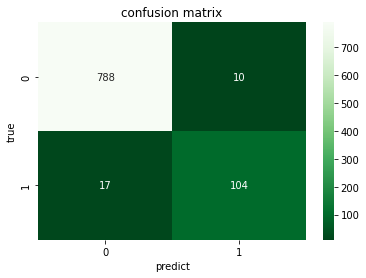

In [95]:
dt_accuracy_dict = dict()
dt_d_list = [10,20,30,40,50,60,70,80,90,100]
dt_y_pred_max = 0
dt_testy_max = 0
dt_acc_max = 0
dt_f1_max = 0
dt_n_max = 0
for d in dt_d_list:
  dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = d)
  dt.fit(trainx,trainy)
  y_pred = dt.predict(testx)
  acc = accuracy_score(y_pred,testy)
  auc = roc_auc_score(y_pred,testy)
  f1 = f1_score(y_pred,testy)
  recall = recall_score(y_pred,testy)
  precision = precision_score(y_pred,testy)
  if dt_acc_max < acc:
      dt_acc_max = acc
      dt_y_pred_max = y_pred
      dt_testy_max = testy
      dt_f1_max = f1
      dt_n_max = d
  dt_accuracy_dict[str(d)]=acc
  print('max_depth:%s' % d)
  print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))
  
  
  
f1_scores['DecisionTree'] = dt_f1_max
accuracy_scores['DecisionTree'] = dt_acc_max



cm = confusion_matrix(dt_testy_max,dt_y_pred_max)

ax = sn.heatmap(cm,annot=True,fmt='.20g',cmap='Greens_r')
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

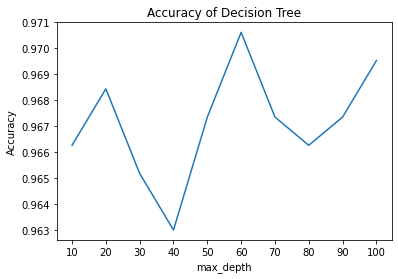

In [96]:
dt_s=pd.Series(dt_accuracy_dict,name='value')
sn.lineplot(data=dt_s)
plt.title('Accuracy of Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

## 4. RandomForest

max_depth:10
accuracy_score:0.969532100108814, roc-auc:0.9738756364913338, f1-score:0.871559633027523, recall:0.979381443298969, precision:0.7851239669421488
max_depth:20
accuracy_score:0.969532100108814, roc-auc:0.9738756364913338, f1-score:0.871559633027523, recall:0.979381443298969, precision:0.7851239669421488
max_depth:30
accuracy_score:0.9749727965179543, roc-auc:0.9815689865689865, f1-score:0.8959276018099549, recall:0.99, precision:0.8181818181818182
max_depth:40
accuracy_score:0.970620239390642, roc-auc:0.9745705834099778, f1-score:0.8767123287671232, recall:0.9795918367346939, precision:0.7933884297520661
max_depth:50
accuracy_score:0.970620239390642, roc-auc:0.9745705834099778, f1-score:0.8767123287671232, recall:0.9795918367346939, precision:0.7933884297520661
max_depth:60
accuracy_score:0.9717083786724701, roc-auc:0.9796385481726742, f1-score:0.8807339449541285, recall:0.9896907216494846, precision:0.7933884297520661
max_depth:70
accuracy_score:0.970620239390642, roc-auc:0

Text(33.0, 0.5, 'true')

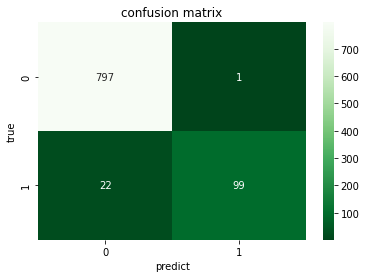

In [83]:
rf_accuracy_dict = dict()
rf_n_list = [10,20,30,40,50,60,70,80,90,100]
rf_y_pred_max = 0
rf_testy_max = 0
rf_acc_max = 0
rf_f1_max = 0
rf_n_max = 0
for n in rf_n_list:
  RF = RandomForestClassifier(n_estimators=n)
  RF.fit(trainx,trainy)
  y_pred = RF.predict(testx)
  acc = accuracy_score(y_pred,testy)
  auc = roc_auc_score(y_pred,testy)
  f1 = f1_score(y_pred,testy)
  recall = recall_score(y_pred,testy)
  precision = precision_score(y_pred,testy)
  if rf_acc_max < acc:
      rf_acc_max = acc
      rf_y_pred_max = y_pred
      rf_testy_max = testy
      rf_f1_max = f1
      rf_n_max = n
  rf_accuracy_dict[str(n)]=acc
  print('max_depth:%s' % n)
  print('accuracy_score:{}, roc-auc:{}, f1-score:{}, recall:{}, precision:{}'.format(acc,auc,f1,recall,precision))
  
f1_scores['RandomForest']=rf_f1_max
accuracy_scores['RandomForest'] = rf_acc_max



cm = confusion_matrix(rf_testy_max,rf_y_pred_max)

ax = sn.heatmap(cm,annot=True,fmt='.20g',cmap='Greens_r')
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

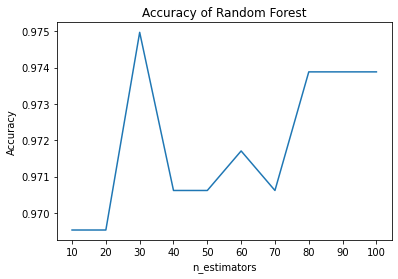

In [84]:
rf_s=pd.Series(rf_accuracy_dict,name='value')
sn.lineplot(data=rf_s)
plt.title('Accuracy of Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

## Plog the F1-Score Result

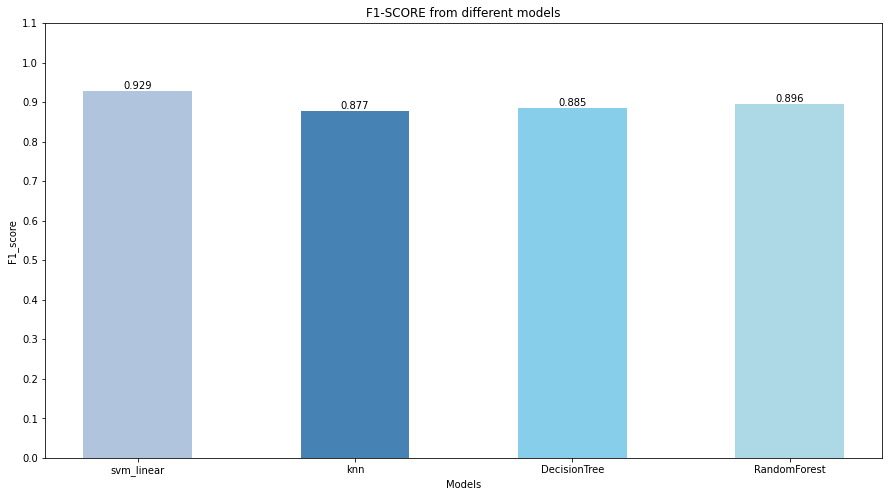

In [99]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (15,8))
colors=['#B0C4DE','#4682B4','#87CEEB','#ADD8E6','#B0E0E6']
ax.bar(f1_scores.keys(),f1_scores.values(),width=0.5,color = colors)

ax.set_title(label='F1-SCORE from different models')
plt.yticks(np.arange(0,1.2,0.1))
plt.xlabel('Models')
plt.ylabel('F1_score')

for model,score in f1_scores.items():
    plt.text(model,score,'%.3f'%score,ha='center',va='bottom')
plt.show()

## Plog the Accuracy Result

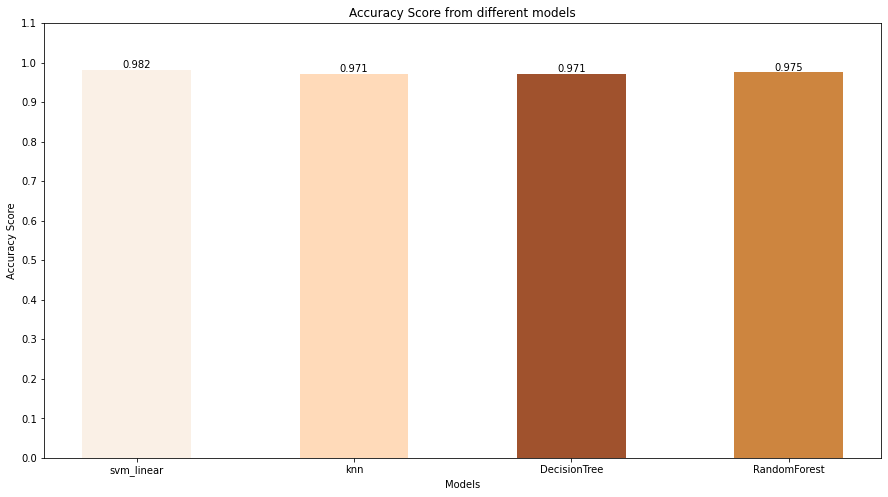

In [100]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize = (15,8))

colors=['linen','peachpuff','sienna','peru']
ax.bar(accuracy_scores.keys(),accuracy_scores.values(),width=0.5,color = colors)

ax.set_title(label='Accuracy Score from different models')
plt.yticks(np.arange(0,1.2,0.1))
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

for model,score in accuracy_scores.items():
    plt.text(model,score,'%.3f'%score,ha='center',va='bottom')
plt.show()